In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.transform import rescale
from scipy.signal import convolve2d

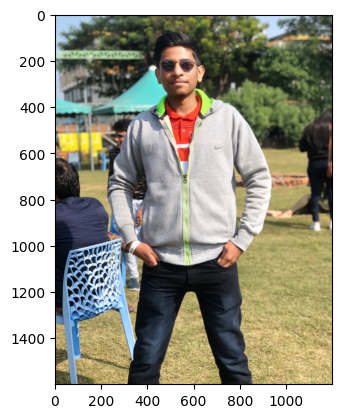

In [2]:
my_dog = imread('my-image.jpg')
plt.imshow(my_dog, cmap='gray')


In [3]:
r_scaled = rescale(my_dog[:,:,0], 0.10)
g_scaled = rescale(my_dog[:,:,1], 0.10)
b_scaled = rescale(my_dog[:,:,2], 0.10)
my_dog_scaled = np.stack([r_scaled, g_scaled, b_scaled], axis=2)
my_dog_gray = rescale(rgb2gray(my_dog), 0.10)


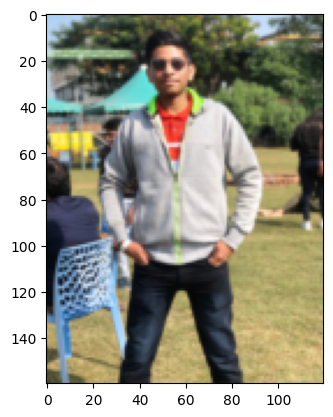

In [4]:
plt.imshow(my_dog_scaled, cmap='gray')


In [5]:
def rgb_convolve2d(image, kernel):
    red = convolve2d(image[:,:,0], kernel, 'valid')
    green = convolve2d(image[:,:,1], kernel, 'valid')
    blue = convolve2d(image[:,:,2], kernel, 'valid')
    return np.stack([red, green, blue], axis=2)


In [6]:
identity = np.array([[0, 0, 0],
                     [0, 1, 0],
                     [0, 0, 0]])
def display_image(conv_im1, kernel):
  fig, ax = plt.subplots(1,2, figsize=(12,5))
  ax[0].imshow(kernel, cmap='gray')
  ax[1].imshow(abs(conv_im1), cmap='gray')
def apply_kernel(img, kernel, display = False):
  conv_im1 = rgb_convolve2d(img, kernel)
  if display:
    display_image(conv_im1, kernel)
  else:
    return conv_im1
  


In [7]:
# Edge Detection1
kernel1 = np.array([[0, -1, 0],
                    [-1, 4, -1],
                    [0, -1, 0]])
# Edge Detection2
kernel2 = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
# Bottom Sobel Filter
kernel3 = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])
# Top Sobel Filter
kernel4 = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])
# Left Sobel Filter
kernel5 = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])
# Right Sobel Filter
kernel6 = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])


# Sharpen
kernel7 = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# Emboss
kernel8 =  np.array([[-2, -1, 0],
                     [-1,  1, 1],
                     [ 0,  1, 2]])
# Box Blur
kernel9 = (1 / 9.0) * np.array([[1, 1, 1],
                                [1, 1, 1],
                                [1, 1, 1]])
# Gaussian Blur 3x3
kernel10 = (1 / 16.0) * np.array([[1, 2, 1],
                                  [2, 4, 2],
                                  [1, 2, 1]])
# Gaussian Blur 5x5
kernel11 = (1 / 256.0) * np.array([[1, 4, 6, 4, 1],
                                   [4, 16, 24, 16, 4],
                                   [6, 24, 36, 24, 6],
                                   [4, 16, 24, 16, 4],
                                   [1, 4, 6, 4, 1]])
# Unsharp masking 5x5
kernel12 = -(1 / 256.0) * np.array([[1, 4, 6, 4, 1],
                                   [4, 16, 24, 16, 4],
                                   [6, 24, -476, 24, 6],
                                   [4, 16, 24, 16, 4],
                                   [1, 4, 6, 4, 1]])



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


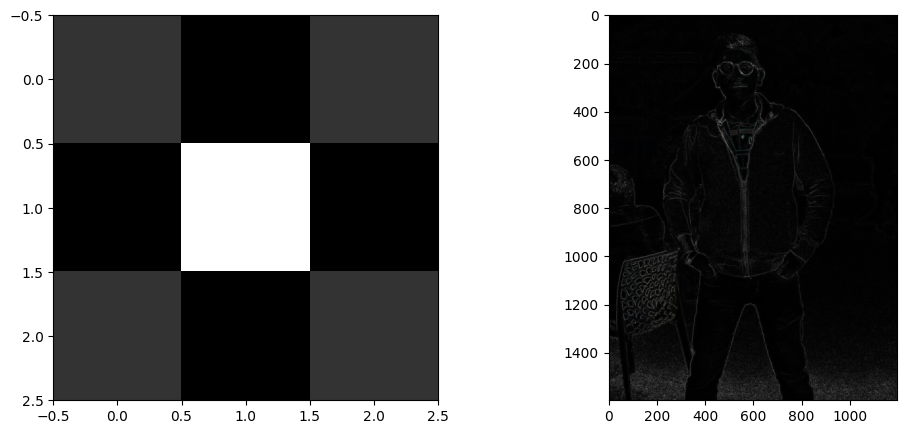

In [8]:
apply_kernel(my_dog, kernel1, True)

In [48]:

# import the opencv library
import cv2
from time import sleep
from win32gui import SetForegroundWindow
from pywinauto.findwindows import find_window

  
# define a video capture object
vid = cv2.VideoCapture(0)
  
# ret, frame = vid.read()

# frame = apply_kernel(frame, kernel1, True)

ret, frame = vid.read()
    
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# frame = apply_kernel(frame, kernel1, False)
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

# print(frame)
# Display the resulting frame
# plt.imshow(frame)
cv2.imshow('frame', frame)
while(True):
    cv2.imshow('frame', frame)
    sleep(1)
    cv2.setWindowProperty("frame", cv2.WND_PROP_TOPMOST, 1)

    SetForegroundWindow(find_window(title="frame"))


    if cv2.waitKey(1) & 0xFF == ord('q'):
        print('breakiing')
        break

while(False):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
    
    frame = apply_kernel(frame, kernel1, False)
  
    # Display the resulting frame
    cv2.imshow('frame', frame)
      
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
# cv2.destroyAllWindows()

OSError: [WinError -2147417850] Cannot change thread mode after it is set

In [37]:
vid.release()

In [47]:
cv2.destroyAllWindows()